<a href="https://colab.research.google.com/github/MJ-GINI/first-repository/blob/master/2025_10_20_MainQuest_BasicStatistics_%EC%9D%B4%EB%AF%B8%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


| 변수명             | 데이터 타입                  | 설명                               |
| :-------------- | :---------------------- | :------------------------------- |
| **InvoiceNo**   | object                  | 고유 거래 번호 / C로 시작하면 취소 주문 |
| **StockCode**   | object                  | 상품 고유 코드                        |
| **Description** | object                  | 상품 설명                      |
| **Quantity**    | int64                   | 주문 수량 (취소 건 = 음수값)            |
| **InvoiceDate** | object  | 주문 일시                         |
| **UnitPrice**   | float64                 | 상품 단가 (파운드 단위)                   |
| **CustomerID**  | float64                 | 고객 식별자                  |
| **Country**     | object                  | 국가명                          |


- CustomerID, Description: 결측치 존재
- InvoiceDate: datetime 변환
- UnitPrice, Quantity 음수값: 확인 필요 -> 취소 건 -> InvoiceNo. 'C'
- UnitPrice * Queantity = TotalPrice 총 가격 변수 생성

In [8]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [9]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [11]:
# 1-1. 모집단 통계 확인
population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()
print("1-1. 모집단 통계 확인")
print("Population mean: {:.3f}".format(population_mean))
print("Population std: {:.3f}".format(population_std))

1-1. 모집단 통계 확인
Population mean: 17.988
Population std: 378.811


In [12]:
# 1-2. 무작위 표본 n=1000 추출
sample = df['TotalPrice'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
sample_std = sample.std()
print("1-2. 표본(n=1000) 통계 확인")
print("Sample mean: {:.3f}".format(sample_mean))
print("Sample std: {:.3f}".format(sample_std))

1-2. 표본(n=1000) 통계 확인
Sample mean: 16.832
Sample std: 64.467


In [13]:
# 1-3. 전체 데이터셋(모집단)과 표본의 'TotalPrice'에 대한 평균과 표준편차 비교
stats_comparison = pd.DataFrame({
    'Mean': [population_mean, sample_mean],
    'Std': [population_std, sample_std]
}, index=['Population', 'Sample'])

print("1-3. 모집단 vs. 표본 통계 비교")
print(stats_comparison.round(3))  # 소수점 3자리까지 표시

1-3. 모집단 vs. 표본 통계 비교
              Mean      Std
Population  17.988  378.811
Sample      16.832   64.467


#### * 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  

**[답변]**
- 표본평균(16.8)은 모집단평균(18)과 큰 차이가 없음 => 표본이 모집단을 잘 대표함
- 단, 모집단 표준편차(378.8)과 표본 표준편차(64.5)는 차이가 큼 => 표본 평균의 분산(변동성)이 훨씬 낮음

In [14]:
# 1-4. 중심극한정리 시뮬레이션
sample_means = []
for _ in range(1000):
    s = df['TotalPrice'].sample(n=1000, replace=True)
    sample_means.append(s.mean())

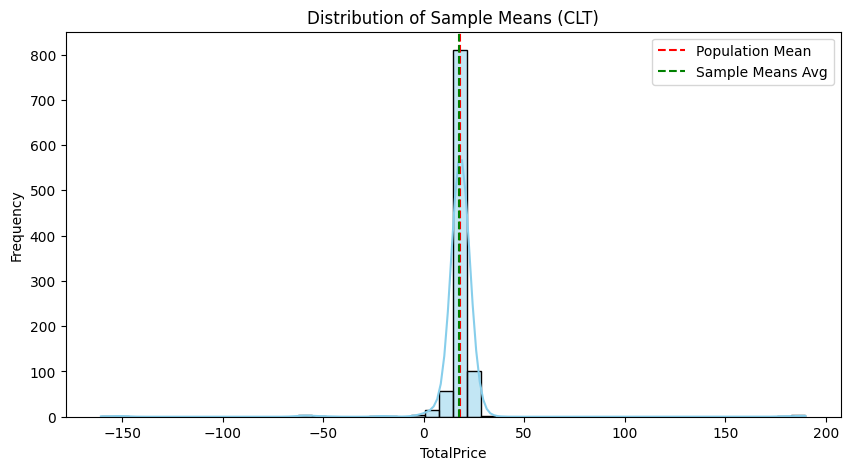

In [15]:
# 1-5. 시각화
plt.figure(figsize=(10,5))
sns.histplot(sample_means, bins=50, kde=True, color='skyblue')
plt.axvline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.axvline(np.mean(sample_means), color='green', linestyle='--', label='Sample Means Avg')
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### * 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

**[답변]**
- 동일 크기(n=1000) 표본을 1000번 시뮬레이션 수행 시, \
표본평균의 분포는 정규분포(모집단)에 근사함 확인 \
=> 모집단 분포가 극단적으로 치우쳐 있어도, 표본평균은 정규형태로 나타나고 \
표본평균이 모집단 평균 근처에 위치한다는 '중심극한정리(CLT)' 확인

<br>

- 표본평균 = 모집단 평균 추정치
- 표본 크기 증가 -> 표본 평균 변동성 감소
- 모집단에 outlier가 있었지만, 표본평균은 중심극한정리를 나타냄

<br>

- 히스토그램을 통해 위 내용을 시각화하여 직관적으로 확인 가능

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [16]:
# 2-1. 주문수 기준 Top 2 국가 확인 (Country 빈도수 기준 상위 2개 국가)
top_countries = df['Country'].value_counts().head(2).index.tolist()

# 2-2. 주문수 기준 Top 2 국가의 TotalPrice 통계 확인
stats_df = pd.DataFrame({
    'Country': top_countries,
    'Mean_TotalPrice': [df[df['Country']==c]['TotalPrice'].mean() for c in top_countries],
    'Std_TotalPrice': [df[df['Country']==c]['TotalPrice'].std() for c in top_countries],
    'Count': [df[df['Country']==c].shape[0] for c in top_countries]
})
stats_df = stats_df.round(3)

# 결과물 출력
print("2-1 / 2-2. 주문수 기준 상위 2개 국가 'TotalPrice' 통계")
display(stats_df)

2-1 / 2-2. 주문수 기준 상위 2개 국가 'TotalPrice' 통계


,Country,Mean_TotalPrice,Std_TotalPrice,Count
0,United Kingdom,16.525,394.839,495478
1,Germany,23.349,37.325,9495


**[답변]**

- 주문수 Top 2 국가 : UK, Germarny
- 주문수 Top 1인 UK는 표준편차가 394.8로 큰 편 -> 반품/취소, 대량주문 영향 확인 필요 -> Outlier

In [17]:
# 2-3. 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증

# t-검정을 위한 ttest_ind 함수 불러오기
from scipy.stats import ttest_ind

# 독립표본 t-검정 수행
country1_prices = df[df['Country']==top_countries[0]]['TotalPrice']
country2_prices = df[df['Country']==top_countries[1]]['TotalPrice']
t_stat, p_value = ttest_ind(country1_prices, country2_prices, equal_var=False)  # Welch's t-검정

# 결과물 출력
print("2-3. 독립표본 t-검정을 통한 TotalPrice 평균 차이 검증")
print("t-통계량: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_value))

2-3. 독립표본 t-검정을 통한 TotalPrice 평균 차이 검증
t-통계량: -10.046
p-value: 0.000


<개념 정리>
- t-검정의 목적: 두 그룹의 평균이 같다 vs. 다르다를 통계적으로 검증
- t-검정의 가정: 두 그룹은 독립적이며, 데이터가 정규분포를 따름 (표본이 크면 중심극한정리 적용 가능)
- t-통계량: 평균 차이가 표준오차 대비 얼마나 큰지 수치로 나타냄
  - 값이 클수록 평균 차이가 큼
  - 음수면 첫번째 그룹의 평균이 두 번째 그룹의 평균보다 작음
- p-value: 우연히 이러한 차이가 발생할 확률 (빈도주의)
  - p < 0.05: 차이가 우연일 가능성 낮음 -> 평균 차이가 통계적으로 유의미함
  - p ≥ 0.05: 차이가 우연일 가능성 높음 -> 평균 차이가 유의하지 않음
- 1종오류/2종오류
  - 1종 오류: 실제로 두 국가의 평균이 같지만, 차이가 있다고 잘못 판단
    - -> 없는 차이를 있다고 속이는 실수
    - p-value < 0.05일 때 발생할 수 있는 오류
  - 2종 오류: 실제로 두 국가의 평균이 다른데, 차이가 없다고 잘못 판단
    - -> 있는 차이를 못 보고 넘어가는 실수
    - p-value ≥ 0.05일 때 발생할 수 있는 오류

#### * t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

**[답변]**
1) t-통계량과 p-value 결과 해석
- 귀무가설: 두 국가의 TotalPrice 평균이 같다.
- 대립가설: 두 국가의 TotalPrice 평균은 다르다=차이가 있다.

- t-통계량 -10.0이 의미하는 바: 1번 영국의 평균이 2번 독일보다 낮음
- p-value 0.000: 귀무가설이 우연일 가능성이 0% = 즉, 귀무가설 기각 \
=> 두 국가 간 'TotalPrice'의 평균 차이는 통계적으로 유의미하다는 결론

<br>

2) 1종 오류와 2종 오류의 개념을 적용하여설명
- 현재 p < 0.05로 1종 오류를 고려해볼 수 있으나, t-검정을 위한 관측 데이터인 주문횟수(Count)가 UK 495,478회, Germany 9,495로 많기 때문에, 표본오차가 발생할 가능성이 적어, 1종 오류를 범할 가능성은 낮음
- t-통계량이 음수(-10)이고, p값도 0.000이므로 차이가 명확하여, 2종 오류의 가능성이 거의 없음

  **=> 즉, 주문 건수가 많아서 평균의 차이가 우연히 발생할 가능성이 없음 \
  => 실제로 차이가 있다고 판단하는 것은 오류일 가능성 또한 없음**

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [18]:
# 3-1. 데이터 준비
# DayOfWeek 컬럼 이용: 0~4 = Weekday, 5~6 = Weekend
df['WeekCategory'] = np.where(df['DayOfWeek'] < 5, 'Weekday', 'Weekend')

# 주중/주말 UnitPrice 데이터 분리
weekday_prices = df[df['WeekCategory']=='Weekday']['UnitPrice']
weekend_prices = df[df['WeekCategory']=='Weekend']['UnitPrice']

In [19]:
# 3-2. 중심경향치(mean, median), 변산성(std, variance), 분위수(25%, 75%) 계산
stats_weekday = {
    'Mean': weekday_prices.mean(),
    'Median': weekday_prices.median(),
    'Std': weekday_prices.std(),
    'Variance': weekday_prices.var(),
    '25%': weekday_prices.quantile(0.25),
    '75%': weekday_prices.quantile(0.75)
}

stats_weekend = {
    'Mean': weekend_prices.mean(),
    'Median': weekend_prices.median(),
    'Std': weekend_prices.std(),
    'Variance': weekend_prices.var(),
    '25%': weekend_prices.quantile(0.25),
    '75%': weekend_prices.quantile(0.75)
}

# 결과 표로 출력
stats_df_week = pd.DataFrame([stats_weekday, stats_weekend], index=['Weekday','Weekend']).round(3)
print("3-1 / 3-2. 주중 vs. 주말 UnitPrice 통계 - 중심경향치, 변산성, 분위수")

display(stats_df_week)

3-1 / 3-2. 주중 vs. 주말 UnitPrice 통계 - 중심경향치, 변산성, 분위수


,Mean,Median,Std,Variance,25%,75%
Weekday,4.843,2.10,103.032,10615.605,1.25,4.13
Weekend,2.888,1.85,7.959,63.354,1.25,3.75


#### * 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.

**[답변]**

* 중심경향치
  - 평균: 주중(4.8) > 주말(2.9) -> 주중 거래 단가가 평균적으로 더 높음
  - 중앙값: 주중(2.1) > 주말(1.9) -> 큰 차이는 없으나, 주중의 중앙값이 다소 높음 \
  -> 주중의 평균과 중앙값의 차이가 큼 -> 평균은 outlier 영향 받음 -> 중앙값 확인 필요

* 변산성
  - 표준편차: 주중(103) > 주말(8) -> 주중 가격 변동성이 주말 대비 매우 큼
  - 분산(표준편차의 제곱): 차이가 훨씬 더 크게 나타남

  => 중심경향치, 특히 평균으로만 데이터를 분석할 경우 오해 발생 농후 \
  => **표준편차, 분산 확인 중요**

* 분위수
  - 전체 데이터의 25%, 75% 기준 가격 확인 시, 주중 vs. 주말 단가에 큰 차이는 없음
  - 분위수가 유효하게 사용될 지표는 아닌 듯 함

In [20]:
# 주중 가격 변동성이 주말 대비 큰 데이터 확인 목적, UnitPrice 기준 outlier 확인

# 주중 거래만 필터
weekday_data = df[df['WeekCategory']=='Weekday']

# UnitPrice 기준 상위 10건 확인 (극단적으로 비싼 거래)
top_expensive_weekday = weekday_data.sort_values('UnitPrice', ascending=False).head(10)
print("--주중 거래 outlier 확인 : UnitPrice--")
display(top_expensive_weekday[['InvoiceNo','StockCode','Quantity','UnitPrice','TotalPrice', 'Description']])

# Quantity 기준 상위 10건 확인 (대량 주문)
top_quantity_weekday = weekday_data.sort_values('Quantity', ascending=False).head(10)
print("--주중 거래 outlier 확인 : Quantity--")
display(top_quantity_weekday[['InvoiceNo','StockCode','Quantity','UnitPrice','TotalPrice', 'Description']])

--주중 거래 outlier 확인 : UnitPrice--


,InvoiceNo,StockCode,Quantity,UnitPrice,TotalPrice,Description
222681,C556445,M,-1,38970.00,-38970.00,Manual
524602,C580605,AMAZONFEE,-1,17836.46,-17836.46,AMAZON FEE
43702,C540117,AMAZONFEE,-1,16888.02,-16888.02,AMAZON FEE
43703,C540118,AMAZONFEE,-1,16453.71,-16453.71,AMAZON FEE
16356,C537651,AMAZONFEE,-1,13541.33,-13541.33,AMAZON FEE
15016,C537630,AMAZONFEE,-1,13541.33,-13541.33,AMAZON FEE
15017,537632,AMAZONFEE,1,13541.33,13541.33,AMAZON FEE
16232,C537644,AMAZONFEE,-1,13474.79,-13474.79,AMAZON FEE
524601,C580604,AMAZONFEE,-1,11586.50,-11586.50,AMAZON FEE
299982,A563185,B,1,11062.06,11062.06,Adjust bad debt


--주중 거래 outlier 확인 : Quantity--


,InvoiceNo,StockCode,Quantity,UnitPrice,TotalPrice,Description
540421,581483,23843,80995,2.08,168469.60,"PAPER CRAFT , LITTLE BIRDIE"
61619,541431,23166,74215,1.04,77183.60,MEDIUM CERAMIC TOP STORAGE JAR
502122,578841,84826,12540,0.00,0.00,ASSTD DESIGN 3D PAPER STICKERS
74614,542504,37413,5568,0.00,0.00,NaN
421632,573008,84077,4800,0.21,1008.00,WORLD WAR 2 GLIDERS ASSTD DESIGNS
206121,554868,22197,4300,0.72,3096.00,SMALL POPCORN HOLDER
220843,556231,85123A,4000,0.00,0.00,?
97432,544612,22053,3906,0.82,3202.92,EMPIRE DESIGN ROSETTE
270885,560599,18007,3186,0.06,191.16,ESSENTIAL BALM 3.5g TIN IN ENVELOPE
52711,540815,21108,3114,2.10,6539.40,FAIRY CAKE FLANNEL ASSORTED COLOUR


Outlier 확인 결과
- UnitPrice가 거의 1~4만 파운드 & Manual or Fee + Quantity는 음수인 경우 다수 => 정상 거래로 보기 어려움
- Quantity 또한 최대 8만 단위까지 존재 & UnitPrice 편차가 큼
- 이러한 이상치 거래로 인해 UnitPrice, TotalPrice의 평균이 크게 증가 -> 표준편차, 분산이 왜곡될 수 있음 \
-> 따라서 중앙값과 분위수는 상대적으로 outlier에 영향을 덜 받아, 실제 거래 패턴 파악 시 유용해보임

/tmp/ipython-input-2066931792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekCategory', y='UnitPrice', data=df, palette=['skyblue','lightgreen'])


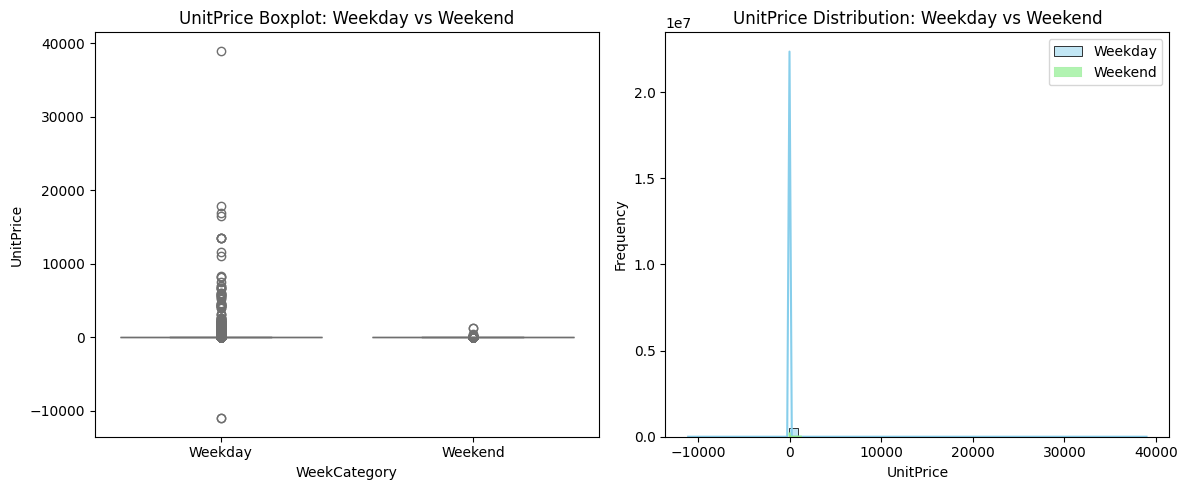

In [21]:
# 3-3-1. 시각화 (상자수염그림, 히스토그램)
plt.figure(figsize=(12,5))

# 상자수염그림 박스플롯
plt.subplot(1,2,1)
sns.boxplot(x='WeekCategory', y='UnitPrice', data=df, palette=['skyblue','lightgreen'])
plt.title('UnitPrice Boxplot: Weekday vs Weekend')
plt.xlabel('WeekCategory')
plt.ylabel('UnitPrice')


# 히스토그램
plt.subplot(1,2,2)
sns.histplot(weekday_prices, bins=50, kde=True, color='skyblue', label='Weekday')
sns.histplot(weekend_prices, bins=50, kde=True, color='lightgreen', label='Weekend', alpha=0.7)
plt.title('UnitPrice Distribution: Weekday vs Weekend')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

#### * 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

**[답변]**
1. 상자수염그림
- UnitPrice 통계 계산에서 확인한 것처럼 주중(weekday)의 outlier의 영향으로 x축 0에 납작하게 압축되어 있어 주중 vs. 주말 차이를 알 수 없음 \
  -> 약 -1만, 4만까지의 매우 극단적인 값 뿐만 아니라 수천건도 다수 존재 \
  -> 심한 양의 왜도와 이상치로 정상적인 분석 불가해보임
2. 히스토그램
- 마찬가지로 주중 UnitPrice의 outlier로 인해 정상적인 분포를 히스토그램으로 확인 불가함
- 극도로 뾰족한 그래프, 주중 vs. 주말 그래프 차이(색상 범주)도 확인 불가 \

=> 오른쪽으로 극단적으로 꼬리가 긴 양의 왜도 \
=> '로그변환'을 통해 분포를 정규분포에 가깝게 만들고 outlier의 영향을 줄이는 방법을 시도하여 \
    UnitPrice 분포를 확인하고 분포의 특징을 확인해보고자 함

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-2451779168.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekCategory', y='UnitPrice', data=df, palette=['skyblue','lightgreen'])
/tmp/ipython-input-2451779168.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekCategory', y='Log_UnitPrice', data=df, palette=['skyblue','lightgreen'])


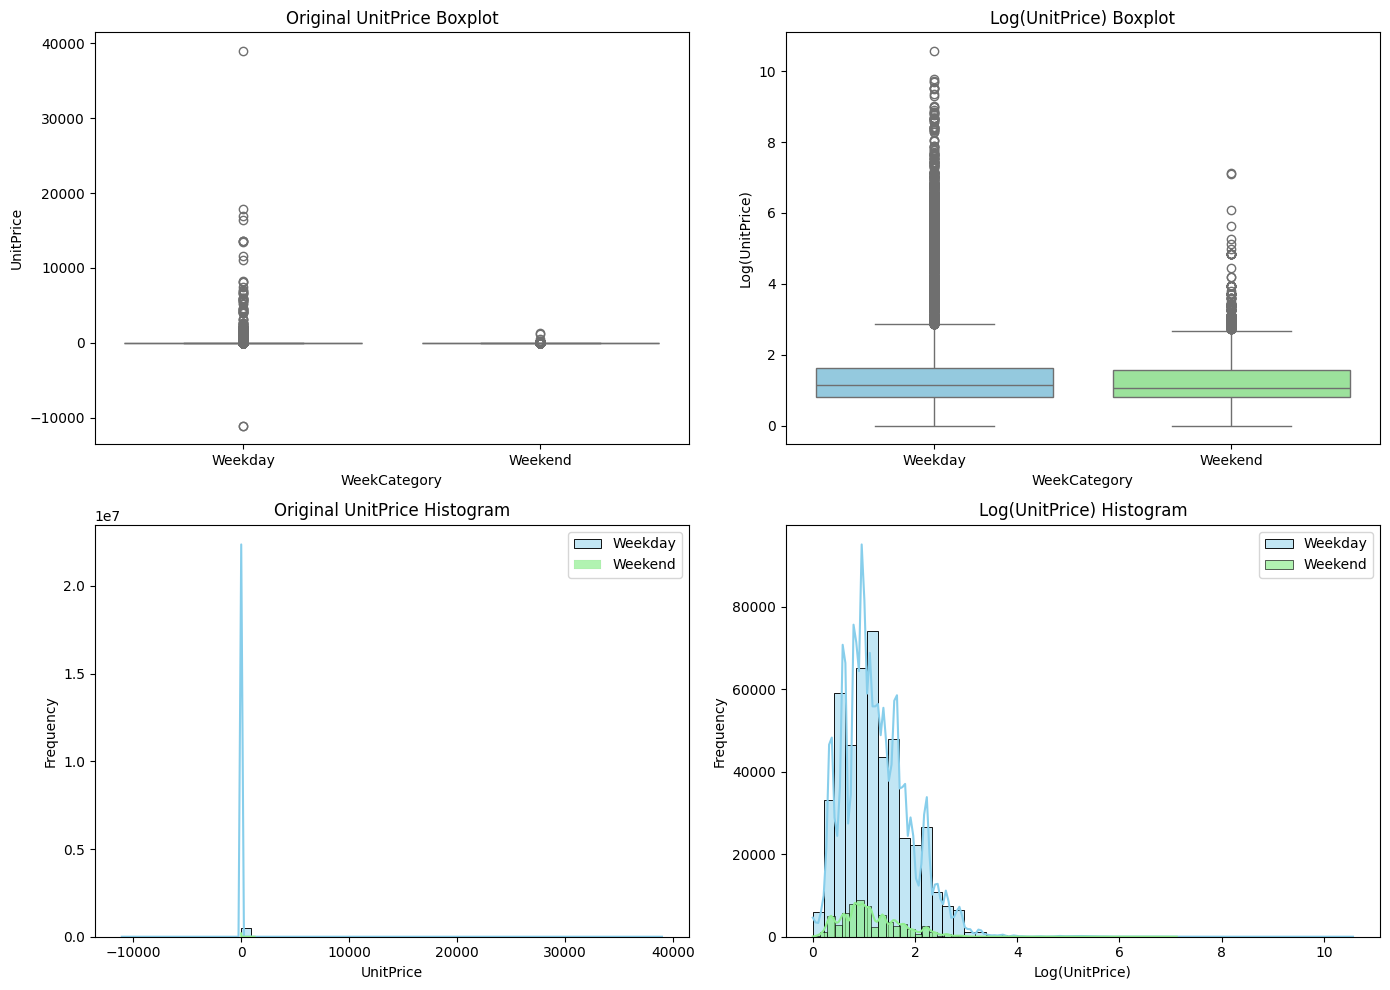

In [22]:
# 3-3-2. 원본 vs. 로그 변환 시각화 비교

# 로그 변환
df['Log_UnitPrice'] = np.log1p(df['UnitPrice'])  # 0인 데이터: log(1 + x) 적용
weekday_prices_log = np.log1p(weekday_prices)
weekend_prices_log = np.log1p(weekend_prices)

# 시각화
plt.figure(figsize=(14,10))

# 1) 상자수염그림: 원본 vs. 로그 변환
plt.subplot(2,2,1)
sns.boxplot(x='WeekCategory', y='UnitPrice', data=df, palette=['skyblue','lightgreen'])
plt.title('Original UnitPrice Boxplot')
plt.xlabel('WeekCategory')
plt.ylabel('UnitPrice')

plt.subplot(2,2,2)
sns.boxplot(x='WeekCategory', y='Log_UnitPrice', data=df, palette=['skyblue','lightgreen'])
plt.title('Log(UnitPrice) Boxplot')
plt.xlabel('WeekCategory')
plt.ylabel('Log(UnitPrice)')

# 2) 히스토그램: 원본 vs. 로그 변환
plt.subplot(2,2,3)
sns.histplot(weekday_prices, bins=50, kde=True, color='skyblue', label='Weekday')
sns.histplot(weekend_prices, bins=50, kde=True, color='lightgreen', label='Weekend', alpha=0.7)
plt.title('Original UnitPrice Histogram')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2,2,4)
sns.histplot(weekday_prices_log, bins=50, kde=True, color='skyblue', label='Weekday')
sns.histplot(weekend_prices_log, bins=50, kde=True, color='lightgreen', label='Weekend', alpha=0.7)
plt.title('Log(UnitPrice) Histogram')
plt.xlabel('Log(UnitPrice)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**[답변]**
**로그 변환 후 시각화**

1. 상자수염그림
- 계산했던 dataframe처럼 주중 vs. 주말의 중앙값, 사분위수가 유사한 분포인 점 확인 가능 (1.5~2.0 사이) \
  -> 단, 주중이 주말보다 중앙값이 약간 더 높은 위치
- 로그 변환 후에도 여전히 이상치는 존재하지만, 원본 스케일처럼 전체를 지배하지는 않는 형태 \
=> 그 결과, **상자수염그림을 통해 데이터 중심 경향과 변동성 파악 가능해짐**

2. 히스토그램
- 로그 변환 후에도 여전히 0~2 부근에 밀집된 봉우리 형태이지만, 전체적인 분포 모양은 확인 가능해짐
- 주중(blue): 데이터 빈도가 주말 대비 월등히 높음 = 거래량 많음 -> 분포의 중심이 1.3~2 사이에 존재
- 주말(green): 주중 대비 거래 빈도 낮음 -> 분포의 중심은 중앙값 근처에 존재

3. 결론
- UnitPrice의 극심했던 양의 왜도와 이상치 문제를 로그 변환으로 완화시켜, 정규분포에 조금 더 가까운 형태를 가지게 됨
- 로그 변환 데이터 기준, 주중과 주말이 UnitPrice 분포의 중앙값은 유사한 위치에 분포하고 있음을 확인
- 주말에 비해 주중의 거래 빈도가 압도적으로 높음 -> 주중 거래가 전체 데이터 분포의 모양을 결정하는 데 더 큰 영향을 미침

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [23]:
# 4-1. 데이터 정리

# 데이터 복사
df_copy = df.copy()

# 1) 결측치 확인
df_copy.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
TotalPrice,0
DayOfWeek,0


In [24]:
# 결측치 비율 확인
df_copy[['CustomerID', 'Description']].isnull().mean() * 100

,0
CustomerID,24.926694
Description,0.268311


#### 결측치 확인
- Description은 비고/설명 정보이고, 결측 비율도 0.26%로 낮기 때문에 **삭제 결정**
- CustomerID는 결측 비율이 약 25%로 높기 때문에 추가 판단 필요

<br>

- 이어지는 4번, 5번 문제에서 RFM 분석을 요구하지 않고, 독립변수로 쓰임이 요구되지 않음 -> 삭제 가능
- 로지스틱 회귀분석(반품 예측)에 있어서도 주요 변수가 아님 -> 삭제 가능
- 단, CustomerID의 결측 비율이 약 25%로 높기 때문에 데이터 손실 방지를 위해 \
=> **비회원 처리하는 것으로 결정**

In [25]:
df_copy[df_copy['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,WeekCategory,Log_UnitPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00,2,12,Weekday,0.000000
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,2,12,Weekday,1.255616
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,2,12,Weekday,1.255616
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40,2,12,Weekday,0.615186
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32,2,12,Weekday,0.978326
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65,4,12,Weekday,1.635106
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52,4,12,Weekday,1.635106
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96,4,12,Weekday,1.785070
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79,4,12,Weekday,2.467252


In [26]:
# 결측치 제거 및 대체
# a. Description 컬럼 삭제 (비핵심, 결측 비율 낮음)
df_copy = df_copy.dropna(subset=['Description'])

In [27]:
# b. CustomerID 결측 시 "NonMember"로 대체
df_copy['CustomerID'] = df_copy['CustomerID'].fillna('NonMember')
df_copy.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
DayOfWeek,0


In [28]:
# 2) 이상치 확인
# a. UnitPrice 수염상자그림에서 확인한 이상치 중, 10,000 이상에 대해서 확인
# UnitPrice가 음수인 것은 삭제 결정

# Quantity가 10,000 이상인 거래 확인
qty_outliers = df[df['Quantity'] >= 10000]
print(f"Quantity 1만 이상 데이터 개수: {qty_outliers.shape[0]}")
display(qty_outliers.head(10))

# UnitPrice가 10,000 이상인 거래 확인
price_outliers = df[df['UnitPrice'] >= 10000]
print(f"\nUnitPrice 1만 이상 데이터 개수: {price_outliers.shape[0]}")
display(price_outliers.head(10))

Quantity 1만 이상 데이터 개수: 3


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,WeekCategory,Log_UnitPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1,1,Weekday,0.71295
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0,4,11,Weekday,0.00000
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,4,12,Weekday,1.12493



UnitPrice 1만 이상 데이터 개수: 10


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,WeekCategory,Log_UnitPrice
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33,1,12,Weekday,9.513576
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33,1,12,Weekday,9.513576
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79,1,12,Weekday,9.508650
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33,1,12,Weekday,9.513576
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02,2,1,Weekday,9.734419
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,-16453.71,2,1,Weekday,9.708367
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00,4,6,Weekday,10.570573
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,4,8,Weekday,9.311367
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom,-11586.50,0,12,Weekday,9.357682
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46,0,12,Weekday,9.789056


#### 이상치 확인

1. Quantity ≥ 10,000인 행 : 3건
- TotalPrice 0원인 건 = 이상치 확실
- TotalPrice는 맞지만, Quantity가 상식적으로 너무 높음 (online retail이라는 가정 하) = 추후 평균, 회귀계수 왜곡 방지를 위해 삭제

2. UnitPrice ≥ 10,000인 행 : 10건
- 대부분 Fee, Manual, Adjust bad debt(대손충당금 조정)으로 상품이 아니기에 삭제 \
-> 단, 이 경우 Description에 동일하게 작성된 다른 데이터도 삭제하기 위해 추가적인 확인 필요

In [29]:
df_copy[~df_copy['Description'].str.contains('AMAZONFEE|Manual|Adjust', case=False, na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,WeekCategory,Log_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,Weekday,1.266948
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Weekday,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,Weekday,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Weekday,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Weekday,1.479329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,12,Weekday,0.615186
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,12,Weekday,1.131402
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12,Weekday,1.638997
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12,Weekday,1.638997


In [30]:
# b. 이상 거래 여부 확인
keywords = ['AMAZON FEE', 'MANUAL', 'ADJUST BAD DEBT']
mask = df_copy['Description'].str.contains('|'.join(keywords), case=False, na=False)

# 이상 거래 건수
num_abnormal = mask.sum()
total_rows = df_copy.shape[0]
ratio_abnormal = num_abnormal / total_rows * 100

print(f"이상 거래 건수: {num_abnormal}")
print(f"전체 행 수: {total_rows}")
print(f"이상 거래 비율: {ratio_abnormal:.2f}%")

이상 거래 건수: 609
전체 행 수: 540455
이상 거래 비율: 0.11%


In [31]:
display(df_copy[mask].tail(10))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,WeekCategory,Log_UnitPrice
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NonMember,United Kingdom,-17836.46,0,12,Weekday,9.789056
524894,580611,M,Manual,1,2011-12-05 11:49:00,0.85,12748.0,United Kingdom,0.85,0,12,Weekday,0.615186
526015,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom,219.50,0,12,Weekday,5.395898
526018,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857.0,United Kingdom,200.00,0,12,Weekday,0.223144
530876,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907.0,United Kingdom,0.85,1,12,Weekday,0.615186
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,5.00,1,12,Weekday,0.810930
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,-125.00,2,12,Weekday,4.836282
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,-9.95,2,12,Weekday,2.393339
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,1.26,3,12,Weekday,0.350657
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,4,12,Weekday,5.419162


- 'AMAZON FEE', 'MANUAL', 'ADJUST BAD DEBT' 키워드가 포함된 거래 건수는 약 0.11%로 낮기 때문에 **삭제 결정**

In [32]:
# 이상치 제거
# 이상 거래(수수료·조정·비정상 항목)
keywords = ['AMAZON FEE', 'MANUAL', 'ADJUST BAD DEBT']
if 'Description' in df_copy.columns:
    mask_abnormal = df_copy['Description'].str.contains('|'.join(keywords), case=False, na=False)
    num_abnormal = mask_abnormal.sum()

    # 이상 거래 제거
    df_copy = df_copy[~mask_abnormal].copy()

# Quantity와 UnitPrice 이상치
df_copy = df_copy[(df_copy['Quantity'] > 0) & (df_copy['Quantity'] < 10000)]
df_copy = df_copy[(df_copy['UnitPrice'] > 0) & (df_copy['UnitPrice'] < 10000)]

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529777 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      529777 non-null  object        
 1   StockCode      529777 non-null  object        
 2   Description    529777 non-null  object        
 3   Quantity       529777 non-null  int64         
 4   InvoiceDate    529777 non-null  datetime64[ns]
 5   UnitPrice      529777 non-null  float64       
 6   CustomerID     529777 non-null  object        
 7   Country        529777 non-null  object        
 8   TotalPrice     529777 non-null  float64       
 9   DayOfWeek      529777 non-null  int32         
 10  InvoiceMonth   529777 non-null  int32         
 11  WeekCategory   529777 non-null  object        
 12  Log_UnitPrice  529777 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(6)
memory usage: 52.5+ MB


- df 541909행 -> df_copy 529777행
- 제거 행 개수: 12,132행
- 감소 비율: 2.24%

In [34]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,WeekCategory,Log_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,Weekday,1.266948
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Weekday,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,Weekday,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Weekday,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Weekday,1.479329


In [35]:
# 4-2. 다중 선형 회귀 분석
# 종속변수: 판매 수량(Quantity)
# 독립변수: 상품 단가(UnitPrice), 판매 국가(Country), 판매 요일(DayOfWeek), 판매 월(InvoiceMonth)

# 필요 패키지 불러오기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) 범주형인 Country를 더미 변수로 변환하여 회귀모델 학습
df_copy = pd.get_dummies(df_copy, columns=['Country'], drop_first=True)

# 2) 독립변수(X)와 종속변수(y) 분리
X = df_copy[['UnitPrice', 'DayOfWeek', 'InvoiceMonth'] +
            [c for c in df_copy.columns if c.startswith('Country_')]]
y = df_copy['Quantity']

# 3) 학습용(train)/테스트용(test) 데이터 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) 수치형 변수 표준화 (StandardScaler)
# 단위가 다른 변수 비교가 가능하도록 표준화 스케일링 -> 학습 안정화
scaler = StandardScaler()
num_cols = ['UnitPrice', 'DayOfWeek', 'InvoiceMonth']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("학습용:", X_train.shape, "테스트용:", X_test.shape)

학습용: (423821, 40) 테스트용: (105956, 40)


In [36]:
# 4-3. 회귀 모델 학습 결과

# 회귀 모델 학습 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 모델 생성
reg = LinearRegression()

# 학습
reg.fit(X_train, y_train)

# 예측
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# 성능 평가
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")

Train R²: 0.0288, Test R²: 0.0385
Train RMSE: 36.7846, Test RMSE: 38.2296


**[답변]**
1. R² 결정계수
  - 학습용과 테스트용 각 2.88%, 3.85%로 모델의 예측 성능이 매우 낮게 나옴..
  - 독립 변수들(UnitPrice, Country, DayOfWeek, InvoiceMonth)이 종속 변수인 판매 수량(Quantity)의 변동을 3~4% 정도만 설명할 수 있다는 것을 의미함
  - 다른 요인이 판매수량의 변동에 의해 발생되고 있어 추가 분석이 필요함
  - 학습용과 테스트용의 R² 차이가 크지 않기에 과적합이 아닌, 과소적합으로 모델이 충분히 학습되지 않은 것으로 판단됨

2. RMSE 평균제곱근오차
  - 모델이 예측한 판매 수량은 실제 판매 수량과 평균 37~38개로 많이 차이남
  - online retail의 판매 수량은 많지 않음 \
  -> (이상치/결측치 제거 전) 원본 데이터에서 75% 분위수 또한 10으로 대부분의 거래서 소량 구매임

In [37]:
# 4-4. 회귀 분석 결과 해석

# 회귀계수 확인
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': reg.coef_
}).sort_values(by='coefficient', key=lambda x: abs(x), ascending=False)

display(coef_df)

,feature,coefficient
30,Country_RSA,-61.680001
39,Country_Unspecified,-60.862810
31,Country_Saudi Arabia,-60.357536
23,Country_Lebanon,-60.201166
13,Country_European Community,-59.604145
25,Country_Malta,-59.593820
38,Country_United Kingdom,-58.895664
17,Country_Greece,-57.773218
21,Country_Italy,-57.632390
29,Country_Portugal,-57.311170


**[답변]**

- 회귀계수: 다른 모든 독립 변수가 고정되어 있을 때, 해당 변수가 1단위 변화할 때 종속변수인 Quantity가 평균적으로 얼마나 변하는지 나타냄
- 설정한 독립변수 4개 중, 가장 강력한 예측 변수: Country 판매 국가 -> Quantity 변동의 주 요인 \
  (drop_first=True로 UK가 결과에 보이지 않는 이유이기도 함)
- 앞서 살펴본대로 UK의 Quantity가 타국가 대비 압도적으로 높았기 때문에, 다른 국가들은 그에 비해 판매 수량이 매우 적음 \
  -> 대부분 국가들에서 회귀계수 -40~-60으로 보여지고 있음

- 수치형 변수 영향력
  - UnitPrice -0.845 : 가격이 높을수록 Quantity 감소
  - DayOfWeek -0.416 : 앞서 주중에 UnitPrice도 몰려 있었으므로, 주말로 갈수록 판매수량이 줄어드는 경향성일 듯으로 보임
  - InvoiceMonth -0.163 : 변수 중 가장 적은 영향력

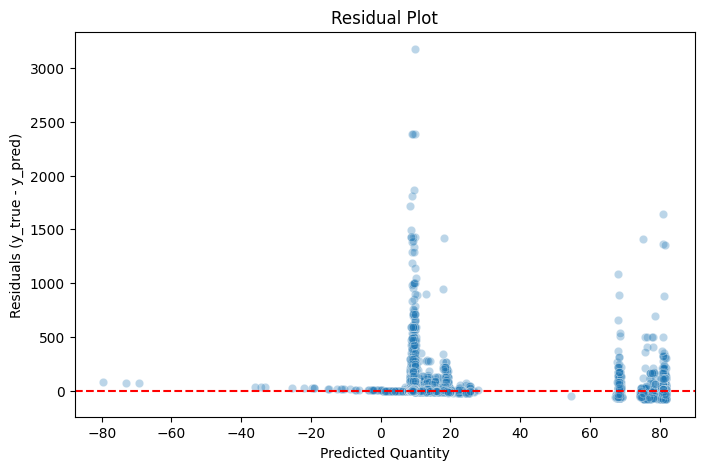

In [38]:
# 4-5. 잔차 시각화

residuals = y_test - y_pred_test

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Quantity')
plt.ylabel('Residuals (y_true - y_pred)')
plt.title('Residual Plot')
plt.show()

**[답변]**
- 잔차를 시각화한 그래프를 보니 작업한 모델의 적합하지 않음을 더 잘 알 수 있음
  - x축: 예측 판매 수량
  - y축: 실제값과 예측값 차이
  - 빨간선: 잔차 0 기준선
  - 모델이 판매수량 Quantity 예측을 잘 하려면 잔차가 0에 수렴해야 하는데, \
  그래프 점들은 예측값이 작을 때 0 근처 -> 예측값이 커지면 불규칙하게 증가(특히 양의 방향으로)

=> 선형 회귀 모델은 정규성 & 잔차의 분산이 일정해야 하는 등분산성이 전제가 되어야 함 \
=> 이러한 이분산성 문제로 인해 회귀계수(coef)의 표준 오차가 부정확 \
  -> R² 및 RMSE 성능이 낮은 모델임이 분명해짐

- 현재 Quantity가 낮은 경우는 잔차가 0에 근접하지만, \
  큰 수량일 때 오차가 극심히 커지고 분포가 커지기 떄문에 \
  아래와 같은 시도를 해볼 수 있을 듯함
1) 앞서 3번에서 UnitPrice에 시도한 Log 변환을 적용 -> 이상치 줄이고, 분포 정규화 시도
2) df_copy에서 이상치 상한 기준치를 낮추는 작업 시도


## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [39]:
# 5-1. 데이터 전처리 및 IsReturn 생성

# 데이터 복사
df_lr = df.copy()

# 모델 성능 비교를 위해 결측치,이상치는 선형회귀와 동일하게 적용

# 1. Description 결측치 제거
df_lr = df_lr.dropna(subset=['Description'])

# 2. CustomerID 결측 시 'NonMember'로 대체
df_lr['CustomerID'] = df_lr['CustomerID'].fillna('NonMember')

# 3. IsReturn 피처 생성 (로지스틱 회귀의 종속 변수)
# Quantity가 0이 아닌 행만 분석에 사용 (음수/양수 모두 포함)
df_lr = df_lr[df_lr['Quantity'] != 0].copy()
df_lr['IsReturn'] = (df_lr['Quantity'] < 0).astype(int)

# 4. 이상 거래 (수수료·조정·비정상 항목) 제거
keywords = ['AMAZON FEE', 'MANUAL', 'ADJUST BAD DEBT']
mask_abnormal = df_lr['Description'].str.contains('|'.join(keywords), case=False, na=False)
df_lr = df_lr[~mask_abnormal].copy()

# 5. Quantity와 UnitPrice 이상치 제거 (반품/정상 통합 처리)
# Quantity: 절댓값이 10000을 넘는 극단적인 이상치 제거
df_lr = df_lr[df_lr['Quantity'].abs() < 10000]

# UnitPrice: 0 초과, 10000 미만 유지
df_lr = df_lr[(df_lr['UnitPrice'] > 0) & (df_lr['UnitPrice'] < 10000)]

# 6. 클래스 불균형 확인
return_rate = df_lr['IsReturn'].mean()
print(f"최종 유효 거래 건수: {len(df_lr):,}건")
print(f"최종 반품률 (IsReturn=1): {return_rate:.4f} (약 {return_rate*100:.2f}%)")

최종 유효 거래 건수: 538,787건
최종 반품률 (IsReturn=1): 0.0167 (약 1.67%)


**[답변]**
- 결측치, 이상치 제거 후 최종 유효 거래건수는 538,787건
- 최종 반품률은 1.67%로 매우 희소한 경우로 확인됨

In [40]:
# 5-2. 모델 학습에 사용할 피쳐 선정 및 모델 학습 준비

# 독립 변수(X)와 종속 변수(y) 분리
X = df_lr[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]
y = df_lr['IsReturn']

# 범주형 변수 OHE (다중공선성 방지를 위해 drop_first=True)
X = pd.get_dummies(X, columns=['Country'], drop_first=True)
X = pd.get_dummies(X, columns=['DayOfWeek'], drop_first=True)
X = pd.get_dummies(X, columns=['InvoiceMonth'], drop_first=True)

# 학습용/테스트용 데이터 분리 (80:20)
# 클래스 불균형을 고려하여 stratify=y를 적용하여 반품 비율을 유지
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train['UnitPrice'] = scaler.fit_transform(X_train[['UnitPrice']])
X_test['UnitPrice'] = scaler.transform(X_test[['UnitPrice']])

print(f"학습 데이터 형태: {X_train.shape}, 테스트 데이터 형태: {X_test.shape}")

학습 데이터 형태: (431029, 54), 테스트 데이터 형태: (107758, 54)


**[답변]**
- 4번 선형회귀와의 차이를 비교해보고 싶어, 해당 독립변수 4개 그대로 사용해 봄
- OHE를 통해 54개의 피처로 확장

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# 모델 학습 (class_weight='balanced'로 반품 클래스에 가중치 부여)
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("\n모델 성능 평가 결과 (Logistics Regression)")
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {auc:.4f}")
print("\n혼동 행렬 (Confusion Matrix):\n", cm)


모델 성능 평가 결과 (Logistics Regression)
정확도 (Accuracy): 0.6226
정밀도 (Precision): 0.0246
재현율 (Recall): 0.5588
F1-Score: 0.0472
ROC-AUC: 0.6345

혼동 행렬 (Confusion Matrix):
 [[66078 39878]
 [  795  1007]]


####반품 예측 로지스틱 회귀 모델의 성능 평가

**[답변]**
- 실제 반품률이 1.67%로 낮음 -> 모델 성능을 신뢰할 수 없는 과대평가 의심
- 정확도 또한 62%로 높은 편이 아님
- 모델이 반품으로 예측한 것 중, 실제 반품이었던 비율 2.5% -> 반품이 아닌 거래를 반품으로 잘못 예측할 오류가 있음을 반증
- 실제 반품 거래 중, 로지스틱 회귀 모델이 올바르게 반품으로 예측한 비율 -> 약 56% => 실제 반품될 거래를 절반 정도 예측 할 수 있음
- 실제 정상인데, 반품으로 예측하는 False Positive가 약 4만 건으로 매우 높음.. \
  -> 매우 낮은 정밀도 2.5%가 주원인으로 판단됨
  -> 정상 거래를 지나치게 희생시켜 반품을 포착하려고 시도하는 부작용..

<br>

- F1 Score: 정밀도와 재현율의 균형이 매우 낮은 4.7%.. -> 로지스틱 회귀 모델도 예측 능력이 부족함
- ROC : 예측 모델로서 유의미한 성능으로 보는 0.7 이상에 미치지 못함

<br>

#### 모델의 성능을 더 높일 수 있는 방안
1. 모델 변경
  - 비선형 트리 기반의 랜덤 포레스트를 사용해서 복잡한 상호작용을 포착해보는 것도 방법일 듯
2. 클래스 불균형 전문 기법 적용
  - False Positive 부장용이 있는 class_weight 대신, SMOTE를 사용하여 학습 데이터 내 반품 클래스(1)의 수를 증가시키는 방법
  - 정밀도와 재현율의 균형을 더 효과적으로 맞출 수 있을 것으로 예상
3. 변수 변경
  - 보다 복잡한 관계가 있을 것으로 예상되어, CustomerID를 활용해 고객별 반품 횟수, 평균 구매액 등의 피쳐를 생성해 예측 변수에 반영
  - 상품별 단가, 반품률을 계산해서 모델에 추가